<a href="https://colab.research.google.com/github/HansHenseler/masdav2023/blob/main/Part_7_Email_analytics_and_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing and visualising emails

Part 7

Master of Advanced Studies in Digital Forensics & Cyber Investigation

Data Analytics and Visualization for Digital Forensics

(c) Hans Henseler, 2023

# Part 7

## 1 Importing python libs

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.__version__

'1.5.3'

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 2 Read the Excel file containing Enron headers

Let's read the excel file containing headers of Enron emails

In [3]:
df = pd.read_excel( "/content/gdrive/MyDrive/Testdata/EnronEmails.xlsx" )
df

,DocID,From,Recipients,Cc,Date,Subject,CustodianName,Location,Day
0,175231,m..presto@enron.com<m..presto@enron.com>,tim.belden@enron.com <tim.belden@enron.com>,NaN,2001-10-16 21:28:28,Son Onofre,presto-k,sent_items,1749
1,232669,magdelena.cruz@enron.com<magdelena.cruz@enron....,e.taylor@enron.com <e.taylor@enron.com>,NaN,2001-07-12 18:23:41,FW: DB# User Feedback,taylor-m,inbox\passwords,1653
2,178812,becky.pitre@enron.com<becky.pitre@enron.com>,richard.ring@enron.com <richard.ring@enron.com>,NaN,2001-10-23 22:26:39,FW: Termination Proceedings,ring-r,inbox,1756
3,5834,eric.bass@enron.com<eric.bass@enron.com>,shanna.husser@enron.com <shanna.husser@enron.c...,NaN,2000-08-07 13:51:00,Austin?,bass-e,_sent_mail,1314
4,187302,cara.semperger@enron.com<cara.semperger@enron....,shift.portland@enron.com <shift.portland@enron...,NaN,2001-06-23 01:05:41,IDAHO HAS A NEW NERC ACRONYM,salisbury-h,inbox,1634
...,...,...,...,...,...,...,...,...,...
252960,4869,joanne.rozycki@enron.com<joanne.rozycki@enron....,susan.bailey@enron.com <susan.bailey@enron.com>,NaN,2002-01-24 17:06:32,Gerald Nemec is out of office thru Monday,bailey-s,deleted_items,1849
252961,215514,matt.smith@enron.com<matt.smith@enron.com>,asalazar@pirnie.com <asalazar@pirnie.com>,NaN,2001-02-28 17:08:00,RE:,smith-m,_sent_mail,1519
252962,219842,d..steffes@enron.com<d..steffes@enron.com>,c..williams@enron.com <c..williams@enron.com>;...,wanda.curry@enron.com <wanda.curry@enron.com>;...,2001-10-10 23:18:22,RE: SCE Late Charges,steffes-j,sent_items,1743
252963,10820,sally.beck@enron.com<sally.beck@enron.com>,bob.hall@enron.com <bob.hall@enron.com>,NaN,2001-01-17 09:21:00,Re: Good Morning.,beck-s,_sent_mail,1477


In [4]:
df.shape

(252965, 9)

## 2 Replace missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252965 entries, 0 to 252964
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DocID          252965 non-null  int64         
 1   From           252965 non-null  object        
 2   Recipients     243682 non-null  object        
 3   Cc             59630 non-null   object        
 4   Date           252965 non-null  datetime64[ns]
 5   Subject        244260 non-null  object        
 6   CustodianName  252965 non-null  object        
 7   Location       252957 non-null  object        
 8   Day            252965 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 17.4+ MB


We have values that are Null. Let's replace these with empty string

In [6]:
df=df.fillna("")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252965 entries, 0 to 252964
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DocID          252965 non-null  int64         
 1   From           252965 non-null  object        
 2   Recipients     252965 non-null  object        
 3   Cc             252965 non-null  object        
 4   Date           252965 non-null  datetime64[ns]
 5   Subject        252965 non-null  object        
 6   CustodianName  252965 non-null  object        
 7   Location       252965 non-null  object        
 8   Day            252965 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 17.4+ MB


## 3 List custodians and number of emails per custodian

Example: how many emails for custodian beck-s?

In [8]:
df[df.CustodianName=="beck-s"].shape[0]

4833

In [9]:
# List the custodians using value_counts

custodians = pd.DataFrame(df['CustodianName'].value_counts()).rename(columns={"CustodianName": "Count"})
custodians

,Count
dasovich-j,15776
kaminski-v,11228
jones-t,10148
shackleton-s,9236
mann-k,7461
...,...
slinger-r,121
solberg-g,87
south-s,57
phanis-s,26


In [10]:
# note: we could have counted the number of records for each custodian also using value_counts:

df["CustodianName"].value_counts()

dasovich-j      15776
kaminski-v      11228
jones-t         10148
shackleton-s     9236
mann-k           7461
                ...  
slinger-r         121
solberg-g          87
south-s            57
phanis-s           26
merriss-s          14
Name: CustodianName, Length: 150, dtype: int64

## 4 Filter email subjects on keyword

Select all emails that have the word blockbuster or enron in the subject

In [12]:
df[df['Subject'].str.contains("[bB]lockbuster|[eE]nron",na=False)].shape[0]

22

## 5 Create a timeline of email count between 1-1-1999 and 1-1-2002

Create a histogram showing the number of emails per week

In [13]:
# Create a Day column

df['Day']=df['Date'].dt.date
df

,DocID,From,Recipients,Cc,Date,Subject,CustodianName,Location,Day
0,175231,m..presto@enron.com<m..presto@enron.com>,tim.belden@enron.com <tim.belden@enron.com>,,2001-10-16 21:28:28,Son Onofre,presto-k,sent_items,2001-10-16
1,232669,magdelena.cruz@enron.com<magdelena.cruz@enron....,e.taylor@enron.com <e.taylor@enron.com>,,2001-07-12 18:23:41,FW: DB# User Feedback,taylor-m,inbox\passwords,2001-07-12
2,178812,becky.pitre@enron.com<becky.pitre@enron.com>,richard.ring@enron.com <richard.ring@enron.com>,,2001-10-23 22:26:39,FW: Termination Proceedings,ring-r,inbox,2001-10-23
3,5834,eric.bass@enron.com<eric.bass@enron.com>,shanna.husser@enron.com <shanna.husser@enron.c...,,2000-08-07 13:51:00,Austin?,bass-e,_sent_mail,2000-08-07
4,187302,cara.semperger@enron.com<cara.semperger@enron....,shift.portland@enron.com <shift.portland@enron...,,2001-06-23 01:05:41,IDAHO HAS A NEW NERC ACRONYM,salisbury-h,inbox,2001-06-23
...,...,...,...,...,...,...,...,...,...
252960,4869,joanne.rozycki@enron.com<joanne.rozycki@enron....,susan.bailey@enron.com <susan.bailey@enron.com>,,2002-01-24 17:06:32,Gerald Nemec is out of office thru Monday,bailey-s,deleted_items,2002-01-24
252961,215514,matt.smith@enron.com<matt.smith@enron.com>,asalazar@pirnie.com <asalazar@pirnie.com>,,2001-02-28 17:08:00,RE:,smith-m,_sent_mail,2001-02-28
252962,219842,d..steffes@enron.com<d..steffes@enron.com>,c..williams@enron.com <c..williams@enron.com>;...,wanda.curry@enron.com <wanda.curry@enron.com>;...,2001-10-10 23:18:22,RE: SCE Late Charges,steffes-j,sent_items,2001-10-10
252963,10820,sally.beck@enron.com<sally.beck@enron.com>,bob.hall@enron.com <bob.hall@enron.com>,,2001-01-17 09:21:00,Re: Good Morning.,beck-s,_sent_mail,2001-01-17


In [14]:
import datetime

# we clean up the dates and leave out anything before 1-1-1999 or after 1-1-2002
clean_df = df[(df['Day'] > datetime.date(1999,1,1)) & (df['Day'] < datetime.date(2002,1,1))]

# instead of a pivot we can use value_counts()
emails_per_day = clean_df['Day'].value_counts()

# but we need to change the output into a dataframe and set index plus column names
emails_per_day = emails_per_day.rename_axis('Day').to_frame('Count')
emails_per_day

,Count
Day,
2001-10-25,2023
2001-11-27,1984
2001-10-26,1940
2001-10-24,1860
2001-11-20,1835
...,...
1999-04-20,1
1999-11-25,1
1999-06-05,1


Let's plot this selection

<Axes: xlabel='Day'>

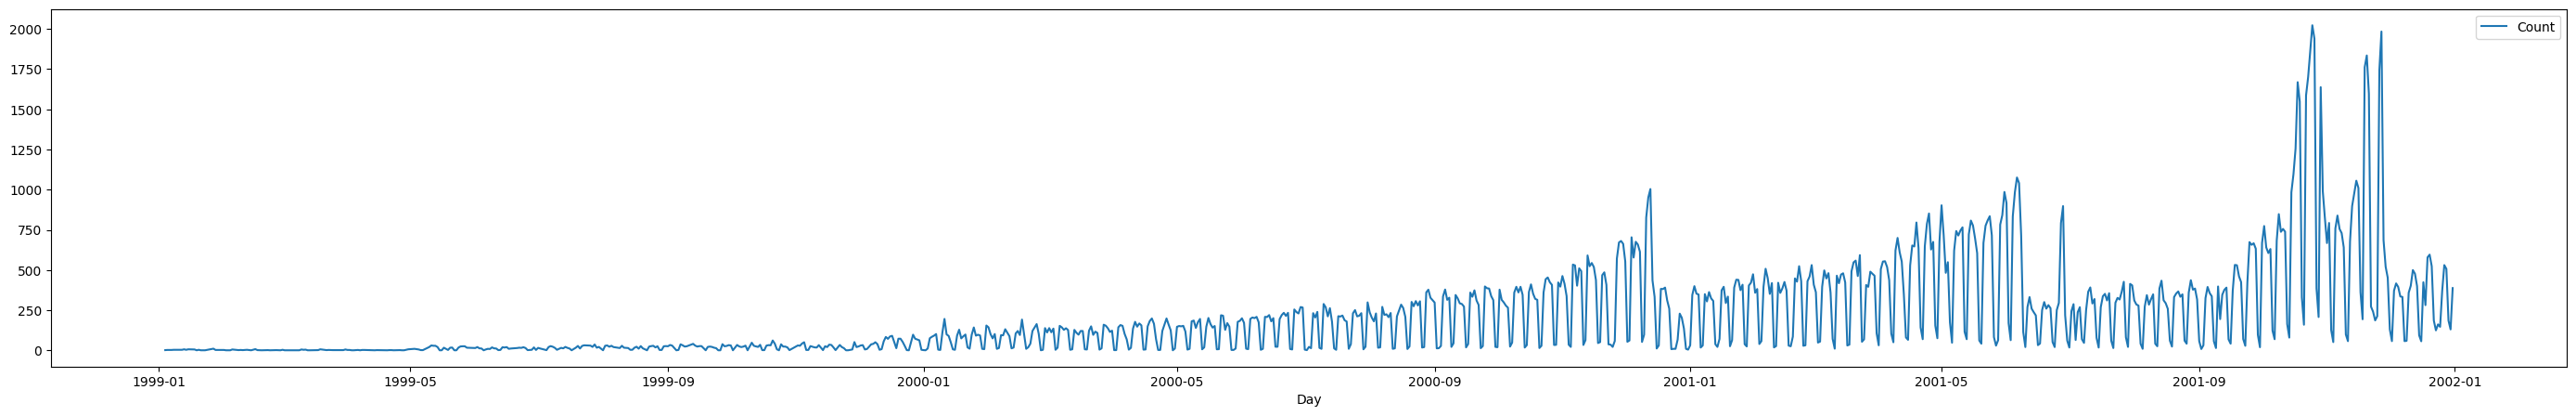

In [15]:
emails_per_day.plot(kind='line',y='Count',figsize=(35,5))

## 6 Network visualisation

Use the networkx library https://networkx.org/

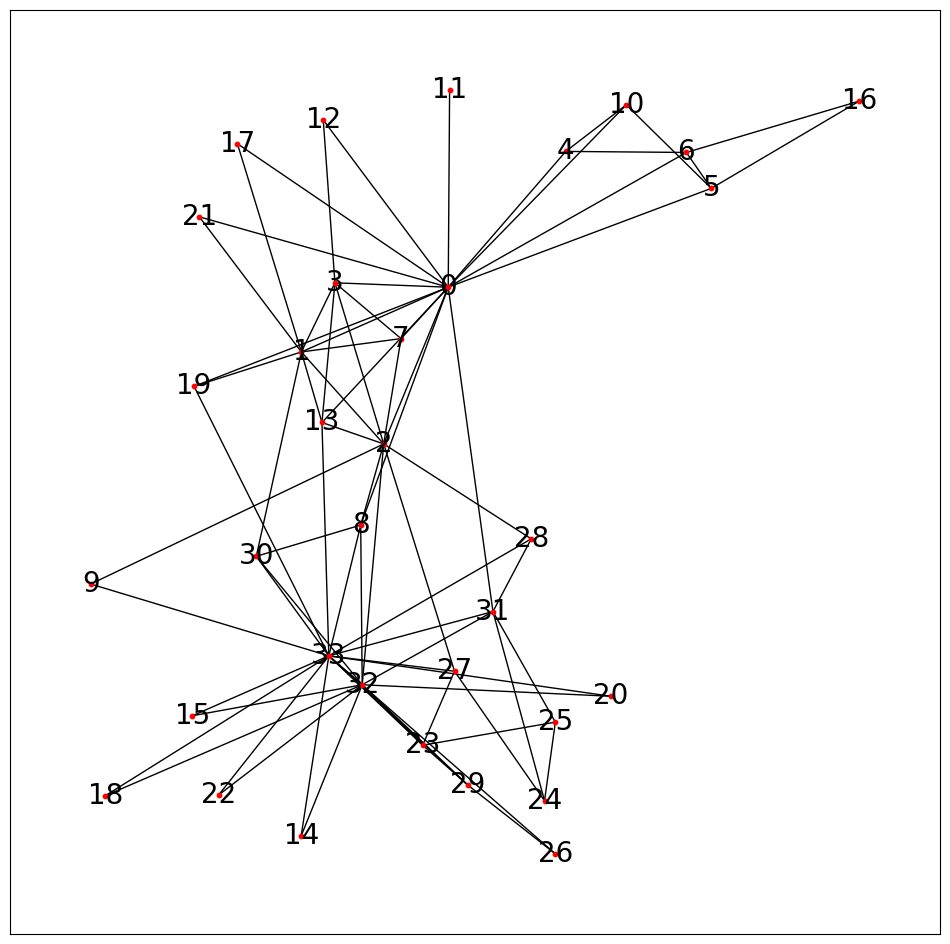

In [51]:
import networkx as nx

# networkx has some sample datasets available. Here is the Karate Club dataset:
# see http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm#zachary

plt.figure(figsize=(12,12))
Gk = nx.karate_club_graph()
nx.draw_networkx(Gk,node_size=10,node_color='red',with_labels=True,font_size=20)

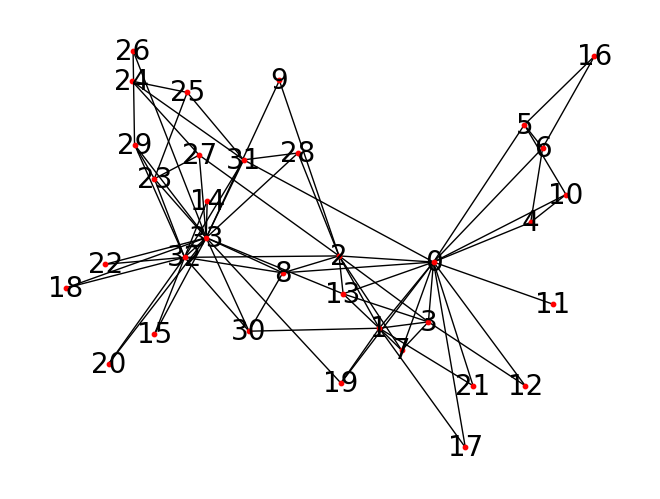

In [65]:
# More networkx visualisations (see https://networkx.org/documentation/stable/reference/drawing.html)

nx.draw(Gk, pos=nx.fruchterman_reingold_layout(Gk), node_size=10,node_color='red',with_labels=True,font_size=20)
#nx.draw(Gk, pos=nx.spring_layout(Gk), node_size=10,node_color='red',with_labels=True,font_size=20)
#nx.draw_spectral(Gk,node_size=10,node_color='red',with_labels=True,font_size=2)
#nx.draw_circular(Gk,node_size=10,node_color='red',with_labels=True,font_size=20)

In [90]:
# Let's try on our email data
# See https://networkx.org/documentation/stable/reference/convert.html

# Read the relations (edges)
relations = pd.read_excel('/content/gdrive/MyDrive/Testdata/Relations.xlsx')
relations

,From,To_Cc,CountOfDocId
0,1,1,2
1,1,2,33
2,1,26,5
3,1,28,8
4,1,29,15
...,...,...,...
357044,84618,13581,1
357045,84619,27426,1
357046,84621,581,1
357047,84622,581,1


In [91]:
# Read the addresses from our emails (vertices)

addresses = pd.read_excel('/content/gdrive/MyDrive/Testdata/Addresses.xlsx')
addresses.set_index(['AddressId'],inplace=True)
addresses

,Count,Address,CustodianID
AddressId,,,
1,2185,m..presto@enron.com,NaN
2,3446,tim.belden@enron.com,NaN
3,41,magdelena.cruz@enron.com,NaN
4,585,e.taylor@enron.com,NaN
5,76,becky.pitre@enron.com,NaN
...,...,...,...
84625,1,sellers'.'prentice@enron.com,NaN
84626,1,sue_nord@enron.enron.net,NaN
84627,1,ceg_ir-sec.um.a.2.105072@joinmail.ccbn.com,NaN


In [66]:
# Put our relations in nx, only take a selection otherwise drawing will take too long

G = nx.from_pandas_edgelist(relations[357000:357048], source='From', target='To_Cc')


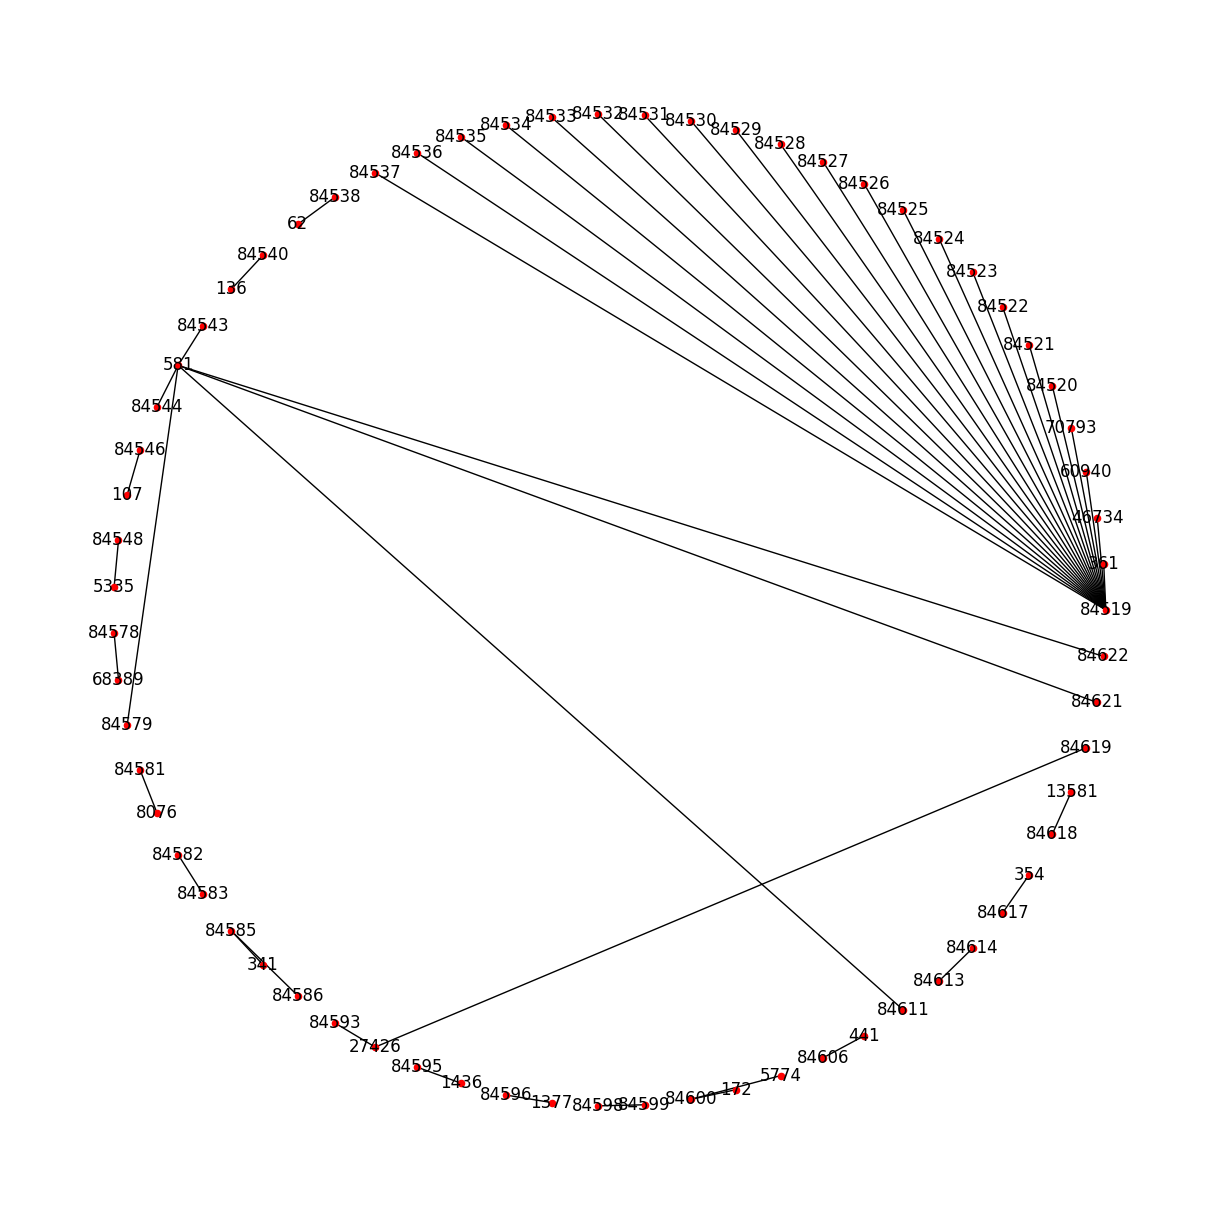

In [67]:
plt.figure(figsize=(12,12))
nx.draw_circular(G,node_size=20,node_color='red',with_labels=True,font_size=12)
plt.show()

### Degree Centrality

Degree centrality defines the importance of a node based on the degree of that node. The higher the degree, the more crucial it becomes in the graph. It’s used to find popular individuals, the most connected individuals, individuals who connect quickly in a wider network, or the ones that hold the most information.

In [92]:
# Degree centrality is easy to calculate. We can take the whole relations table as a graph

G_all = nx.from_pandas_edgelist(relations, source='From', target='To_Cc')

degree = nx.algorithms.centrality.degree_centrality(G_all)
def top10(list):
    i = 0
    for w in sorted(list, key=list.get, reverse=True):
        print(degree[w],'\t',addresses.loc[w]['Address'],' (id:',w,')')
        i+=1
        if i==10:
          break

top10(degree)

0.020947565809774738 	 kenneth.lay@enron.com  (id: 361 )
0.019048636331268246 	 sally.beck@enron.com  (id: 38 )
0.018621377198604287 	 outlook.team@enron.com  (id: 532 )
0.017921146953405017 	 jeff.dasovich@enron.com  (id: 49 )
0.01786180540720169 	 david.forster@enron.com  (id: 338 )
0.01767191245935104 	 jeff.skilling@enron.com  (id: 172 )
0.0159628759286952 	 klay@enron.com  (id: 581 )
0.01488285978779463 	 technology.enron@enron.com  (id: 48720 )
0.013458662678914761 	 tana.jones@enron.com  (id: 278 )
0.012616012722827506 	 sara.shackleton@enron.com  (id: 218 )


In [93]:
addresses.loc[361]['Address']

'kenneth.lay@enron.com'

In [78]:
# Let's create a graph by taking all relations from the top 3 id's into account leaving out 532

important_persons = relations[(\
           (relations.From==361) |\
           (relations.From==38) |\
           (relations.From==49) |\
           (relations.To_Cc==361) |\
           (relations.To_Cc==38) |\
           (relations.To_Cc==49)
           )]

G_important = nx.from_pandas_edgelist(important_persons, source='From', target='To_Cc')
important_persons

,From,To_Cc,CountOfDocId
288,2,38,2
294,2,49,13
754,6,49,2
1104,9,38,1
1125,9,361,1
...,...,...,...
356902,84169,361,1
356909,84198,361,1
356950,84327,38,1
356981,84412,361,1


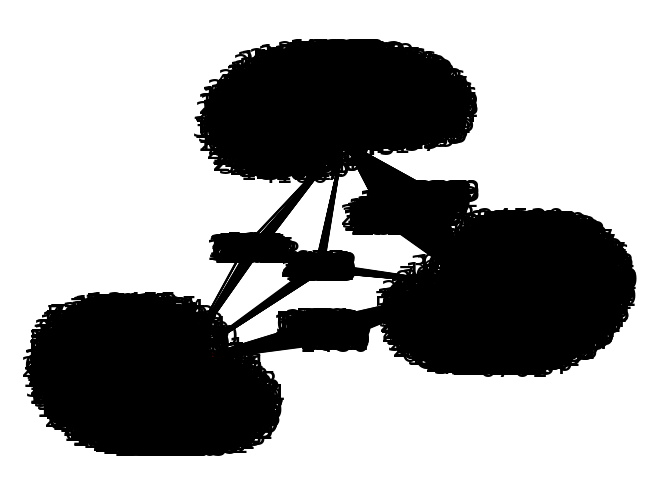

In [80]:
nx.draw(G_important, pos=nx.fruchterman_reingold_layout(G_important), node_size=10,node_color='red',with_labels=True,font_size=20)


### Betweenness Centrality

Betweenness centrality defines the importance of any node based on the number of times it occurs in the shortest paths between other nodes. It measures the percent of the shortest path in a network and where a particular node lies in it.

In [79]:
# betweenness is more complicated but it works after waiting 2 minutes

betweenness = nx.algorithms.centrality.betweenness_centrality(G_important)
top10(betweenness)

0.020947565809774738 	 kenneth.lay@enron.com  (id: 361 )
0.017921146953405017 	 jeff.dasovich@enron.com  (id: 49 )
0.019048636331268246 	 sally.beck@enron.com  (id: 38 )
0.005186451138170857 	 tim.belden@enron.com  (id: 2 )
0.003548624462959007 	 lloyd.will@enron.com  (id: 32 )
0.004711718768544234 	 m..presto@enron.com  (id: 1 )
0.007583849604785302 	 elizabeth.sager@enron.com  (id: 29 )
0.005649315198556814 	 david.delainey@enron.com  (id: 141 )
0.0032281801134610363 	 janet.dietrich@enron.com  (id: 142 )
0.003263785041183033 	 dan.leff@enron.com  (id: 143 )


### Closeness Centrality

Closeness centrality identifies a node's importance based on how close it is to all the other nodes in the graph. The closeness is also known as geodesic distance (GD), which is the number of links included in the shortest path between two nodes.

In [85]:
closeness = nx.algorithms.centrality.closeness_centrality(G_important)
top10(closeness)

0.020947565809774738 	 kenneth.lay@enron.com  (id: 361 )
0.019048636331268246 	 sally.beck@enron.com  (id: 38 )
0.017921146953405017 	 jeff.dasovich@enron.com  (id: 49 )
0.005186451138170857 	 tim.belden@enron.com  (id: 2 )
0.003548624462959007 	 lloyd.will@enron.com  (id: 32 )
0.004711718768544234 	 m..presto@enron.com  (id: 1 )
0.005649315198556814 	 david.delainey@enron.com  (id: 141 )
0.0032281801134610363 	 janet.dietrich@enron.com  (id: 142 )
0.003263785041183033 	 dan.leff@enron.com  (id: 143 )
0.002824657599278407 	 don.black@enron.com  (id: 144 )


### Eigenvector Centrality

Eigenvector centrality defines a node's importance based on the function of its neighboring nodes. For instance, consider a node in a network. Check all the nodes it’s connected to. If a node is linked to or surrounded by highly important nodes in a network, it ought to have a high eigenvector centrality score. It’s what makes it an important part of the whole network.

In [87]:
# We have to use the smaller network G because the G_important is too large for the eigenvector centrality calculation

# NB If you try G_important you will get the following error:
# PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

eigenvector = nx.algorithms.centrality.eigenvector_centrality(G)
top10(eigenvector)

0.00026110280329464264 	 maria.barnet@myhomekey.com  (id: 84519 )
0.020947565809774738 	 kenneth.lay@enron.com  (id: 361 )
2.373661848133115e-05 	 jstrom@hvllc.com  (id: 46734 )
2.373661848133115e-05 	 lwbickle@hvllc.com  (id: 60940 )
2.373661848133115e-05 	 cjones@hvllc.com  (id: 70793 )
1.1868309240665575e-05 	 betty.hung@gs.com  (id: 84520 )
1.1868309240665575e-05 	 bryant.tong@pge-corp.com  (id: 84521 )
1.1868309240665575e-05 	 christensenl@dteenergy.com  (id: 84522 )
1.1868309240665575e-05 	 deforestco@aol.com  (id: 84523 )
1.1868309240665575e-05 	 ira@technologypartners.com  (id: 84524 )


# Exercises

## 1 Heatmap showing number of emails per custodian per day from 1-1-1999 to 1-1-2002

In [ ]:
# hint: create a new column Count with value=1 so that we can use it to count in a pivot operation
clean_df['Count']=1
emails_per_custodian_day = pd.pivot_table( clean_df , values='Count',columns='CustodianName',index='Day', aggfunc="count")
emails_per_custodian_day.fillna(0,inplace=True)
emails_per_custodian_day

# Your answer

## 2 Create a treemap based on CustodianName and using number of emails per custodian as Size

In [ ]:
# Your answer

## 3 What is the most likely email address of a custodian?

In [ ]:
# Your answer

## 4 Create a wordcloud for email subject field contents for custodian beck-s

In [ ]:
# hint: iterate through all rows and put all subjects in a single text string

text = ''
for val in df[df.CustodianName=='beck-s']['Subject']:
  text = '%s %s' % (text,val)
print(text)

# Your answer

## 5 Filter all rows where subject contains Azurix and display heatmap as in 1

In [ ]:
# hint create a filtered dataframe azurix
azurix = clean_df[clean_df['Subject'].str.contains("[Aa]zurix",na=False)]
azurix

# Your answer

## 6 Generate a barplot with time horizontal in weeks and bar height set to emails containing Azurix in the subject as a % of the total number of emails in that week

In [ ]:
# hint 1 create additional columns for year and week

clean_df['Year']=clean_df['Date'].dt.year
clean_df['Week']=clean_df['Date'].dt.week

# and also for the azurix dataframe that was created in exercise 5 earlier
azurix['Year']=azurix['Date'].dt.year
azurix['Week']=azurix['Date'].dt.week

# hint 2 use pivot table to organize values, eg:
# pd.pivot_table( azurix , values="Count", index=['Year','Week'], aggfunc="sum")

# hint 3 use the dataframe merge function to merge the the clean_df and azurix pivot tables
# emails_per_day.merge(azurix_emails_per_day, on=['Year','Week'], how='left',suffixes=('_total', '_azurix'))



# Your answer

## 7 **Advanced** Select a subset of addresses

So that you get a connected graph that can be displayed in Colab with labels in a readable way

Calculate centrality and visually validate if it is (approximately) correct

In [ ]:
# suggestion/hint
#
# In the published paper there is Table 1 with hub's and authorities in the network.
# Here is the table with id's of the addresses in the last column
#
# Address	                    Type	        Id
# sue.nord@enron.com	        Hub	          3896
# henry.means@enron.com       Hub	          5145
# angela.wilson@enron.com     Hub	          3990
# sharonda.stephens@enron.com Hub/Authority	3940
# ann.schmidt@enron.com       Hub/Authority	3188
# jeff.dasovich@enron.com     Authority     7005
# steven.kean@enron.com       Authority      192
# karen.denne@enron.com       Authority      202
#
# let's select rows from the relations[] df that only have one of these id's
#
table1_persons = relations[(\
           (relations.From==3896) |\
           (relations.From==5145) |\
           (relations.From==3990) |\
           (relations.From==3940) |\
           (relations.From==3188) |\
           (relations.From==7005) |\
           (relations.From==192) |\
           (relations.From==202) )\
          &\
          ((relations.To_Cc==3896) |\
           (relations.To_Cc==5145) |\
           (relations.To_Cc==3990) |\
           (relations.To_Cc==3940) |\
           (relations.To_Cc==3188) |\
           (relations.To_Cc==7005) |\
           (relations.To_Cc==192) |\
           (relations.To_Cc==202)\
           )]

# Your answer